# ALGUNOS EJERCICIOS DE VISUALIZACIÓN PARA EL PROYECTO

In [13]:
using Polynomials
using Plots
gr()

Plots.GRBackend()

# Ejercicio 0: Economía (Pronóstico de Ventas)
## 1.  Una empresa tiene datos de ventas mensuales (en miles de dólares) para los primeros 6 meses del año:
   
   $
   \begin{array}{c|c}
   \text{Mes} & \text{Ventas} \\
   \hline
   1 & 120 \\
   2 & 150 \\
   3 & 170 \\
   4 & 160 \\
   5 & 180 \\
   6 & 200 \\
   \end{array}
   $
   
   ## - Usa interpolación de Lagrange para estimar las ventas en el mes 3.5.
   ## - Implementa la solución en Julia.

In [40]:
# Implementación de interpolación de Lagrange
function lagrange_interpolation(x, y, x_eval)
    n = length(x)
    result = 0.0
    for i in 1:n
        term = y[i]
        for j in 1:n
            if j != i
                term *= (x_eval - x[j]) / (x[i] - x[j])
            end
        end
        result += term
    end
    return result
end

# Puntos dados
x = [1, 2, 3, 4, 5, 6]
y = [120, 150, 170, 160, 180, 200]

# Evaluación en x = 3.5
x_eval = 3.5
println("Las ventas estimadas en el mes $x_eval son: ", lagrange_interpolation(x, y, x_eval))

Las ventas estimadas en el mes 3.5 son: 164.8828125


# Ejercicio 1: Ejercicio general
### Supongamos que quieres interpolar los puntos

### (-1,0),(0,1) ,(2,0) ,(3,1) y (4,2) por un polinomio de la medida lo más baja posible.

### (a) ¿Cuál es el grado máximo necesario de este polinomio?
Para interpolar $n+1$ puntos, el polinomio interpolante debe tener un grado máximo de $n$. En este caso, tenemos 5 puntos: $(-1, 0), (0, 1), (2, 0), (3, 1), (4, 2)$. Por lo tanto, el polinomio debe ser de grado máximo $n=4$.

### (b) Sistema de ecuaciones lineales para los coeficientes del polinomio interpolante
El polinomio que queremos encontrar es de la forma:

$
P(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4
$

Debemos establecer un sistema de ecuaciones utilizando los puntos dados. Para cada punto $(x_i, y_i)$, sustituimos $( x_i)$ en el polinomio $P(x)$ y lo igualamos a $y_i$. Esto genera el siguiente sistema de ecuaciones:

1. Para $(-1, 0)$:
   $
   a_0 - a_1 + a_2 - a_3 + a_4 = 0
   $

2. Para $(0, 1)$:
   $
   a_0 = 1
   $

3. Para $(2, 0)$:
   $
   a_0 + 2a_1 + 4a_2 + 8a_3 + 16a_4 = 0
   $

4. Para $(3, 1)$:
   $
   a_0 + 3a_1 + 9a_2 + 27a_3 + 81a_4 = 1
   $

5. Para $(4, 2)$:
   $
   a_0 + 4a_1 + 16a_2 + 64a_3 + 256a_4 = 2
   $

Entonces, el sistema de ecuaciones es:

$
\begin{aligned}
a_0 - a_1 + a_2 - a_3 + a_4 &= 0 \\
a_0 &= 1 \\
a_0 + 2a_1 + 4a_2 + 8a_3 + 16a_4 &= 0 \\
a_0 + 3a_1 + 9a_2 + 27a_3 + 81a_4 &= 1 \\
a_0 + 4a_1 + 16a_2 + 64a_3 + 256a_4 &= 2 \\
\end{aligned}
$

### (c) Resolver el sistema numéricamente en Julia

In [15]:
using LinearAlgebra

# Definir la matriz de coeficientes
A = [
    1 -1  1  -1   1;
    1  0  0   0   0;
    1  2  4   8  16;
    1  3  9  27  81;
    1  4 16  64 256
]

# Definir el vector de resultados
b = [0, 1, 0, 1, 2]

# Resolver el sistema de ecuaciones
x = A\b

# Mostrar los coeficientes del polinomio
println("Los coeficientes del polinomio son: ", x)

Los coeficientes del polinomio son: [1.0000000000000004, -0.44999999999999896, -0.8249999999999996, 0.5499999999999998, -0.07499999999999998]


# Ejercicio 2:
## 2. (a) Supóngase que quieres encontrar un polinomio cúbico $p$ tal que $p(-1)=-2$, $ p'(-1)=1$ , $p(1)=0$ , y $p'(1)=-1$. (Esto se conoce como un interpolante hermita). Escribe un sistema lineal de ecuaciones para los coeficientes de $p$.

El polinomio cúibo $p$ es de la forma $$p=ax^3+bx^2+cx+d$$, y su respectiva derivada es de la forma $$p'=3ax^2+2bx+c$$ Entonces tenemos lo siguiente: $$\array{p(-1)=-a+b-c+d=-2 \\ p'(-1)=3a-2b+c=1 \\ p(1) = a+b+c+d = 0 \\ p'(1)=3a+2b+c=-1
}$$
Lo que nos resulta en el siguiente sistema de ecuaciones lineales donde las incógnitas son $a,b,c,d$:
$$\begin{array}{l} -a+b-c+d=-2 \\ 3a-2b+c = 1 \\ a+b+c+d = 0 \\ 3a+2b+c = -1 \end{array}
$$
Y en forma matricial tenemos:
$$ \begin{bmatrix} -1 & 1 & -1 & 1 \\ 3 & -2 & 1 & 0 \\ 1 & 1 & 1 & 1 \\ 3 & 2 & 1 & 0 \\ \end{bmatrix} \begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix} = \begin{bmatrix} -2 \\ 1 \\ 0 \\-1 \end{bmatrix}
$$


## (b) Usa Julia para resolver el sistema lineal de la parte (a), y haz una gráfica de $p$ sobre $-1 \leq x \leq 1$

In [17]:
A=[-1 1 -1 1 ; 3 -2 1 0 ; 1 1 1 1 ; 3 2 1 0]

4×4 Matrix{Int64}:
 -1   1  -1  1
  3  -2   1  0
  1   1   1  1
  3   2   1  0

In [18]:
d=[-2 ; 1 ; 0 ; -1]

4-element Vector{Int64}:
 -2
  1
  0
 -1

In [19]:
c= A\d

4-element Vector{Float64}:
 -0.49999999999999994
 -0.5
  1.4999999999999998
 -0.5

In [20]:
c1=[c[4], c[3], c[2], c[1]]

4-element Vector{Float64}:
 -0.5
  1.4999999999999998
 -0.5
 -0.49999999999999994

In [21]:
p=Polynomial(c1)

Polynomial(-0.5 + 1.4999999999999998*x - 0.5*x^2 - 0.49999999999999994*x^3)

In [22]:
pder=derivative(p)

Polynomial(1.4999999999999998 - 1.0*x - 1.4999999999999998*x^2)

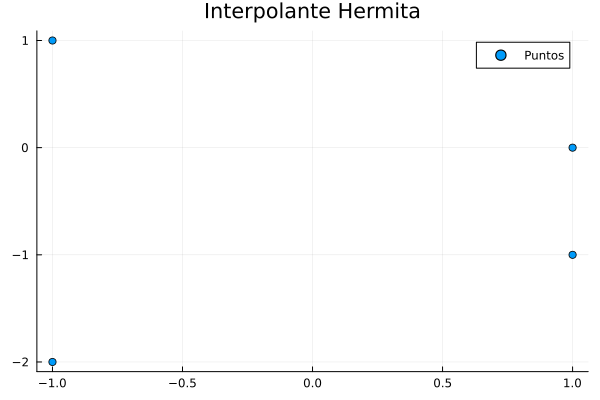

In [23]:
x=[-1,-1,1,1]
y=[-2,1,0,-1]
scatter(x,y, title="Interpolante Hermita", label="Puntos")

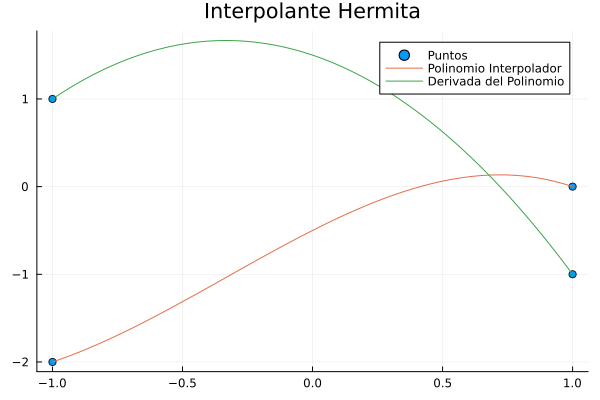

In [24]:
xx=range(-1,1,length=200)
yy=p.(xx)
yd=pder.(xx)
plot!(xx,yy,label="Polinomio Interpolador")
plot!(xx,yd,label="Derivada del Polinomio")


# Ejercicio 3. 
## Aquí están las poblaciones (en millones) para tres países sobre un periodo de 30 años.
   $$\begin{array}{|c|c|c|c|c|} \hline & 1990 & 2000 & 2010 & 2020  \\ \hline \mathrm{Estados Unidos} & 252.120 & 281.711 & 309.011 & 331.003 \\ \hline\mathrm{India} & 873.278 & 1,056.756 & 1,234.281 & 1380.004 \\ \hline\mathrm{Polonia} & 37.960 & 38.557 & 38.330 & 37.847 \\ \hline \end{array}$$
   ## (a) Usa interpolación de polinomio cúbico para estimar la población de USA en 2005.

In [25]:
años=[1990, 2000, 2010 , 2020]
pob = [252.120 , 281.711 , 309.011, 331.003]
aux = años.-1985

V= [aux[i]^j for i=1:4, j=0:3] 

4×4 Matrix{Int64}:
 1   5    25    125
 1  15   225   3375
 1  25   625  15625
 1  35  1225  42875

In [26]:
c=V\pob

4-element Vector{Float64}:
 237.40818750000005
   2.8990708333333286
   0.011172500000000411
  -0.0005028333333333421

In [27]:
pUSA=Polynomial(c)

Polynomial(237.40818750000005 + 2.8990708333333286*x + 0.011172500000000411*x^2 - 0.0005028333333333421*x^3)

In [28]:
pUSA(2005-1985)
u=[2005-1985]
v=pUSA.(u)

1-element Vector{Float64}:
 295.83593750000006

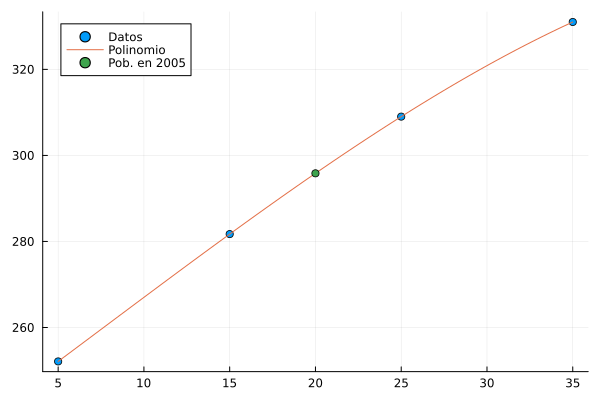

In [29]:
scatter(aux, pob, label="Datos")
xx=range(5,35, length=100)
plot!(xx,pUSA.(xx), label="Polinomio")
scatter!(u,v, label="Pob. en 2005")

# (b) Usa la interpolación del polinomio cúbico para estimar cuando la población en Polonia alcanzó su punto máximo durante este periodo.

In [30]:
pobPol=[37.960,38.557,38.330,37.847]
c2= V\pobPol

4-element Vector{Float64}:
 37.175
  0.19653333333333514
 -0.008380000000000117
  9.466666666666868e-5

In [31]:
pPol = Polynomial(c2)

Polynomial(37.175 + 0.19653333333333514*x - 0.008380000000000117*x^2 + 9.466666666666868e-5*x^3)

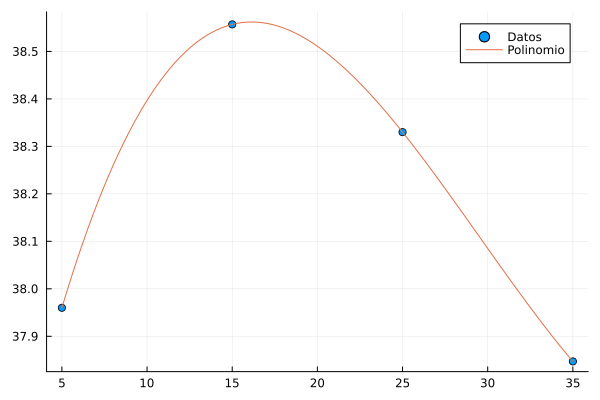

In [32]:
scatter(aux, pobPol, label="Datos")
plot!(xx,pPol.(xx), label="Polinomio")

In [33]:
critics = roots(derivative(pPol)) 

2-element Vector{Float64}:
 16.141161691120477
 42.87292281592134

In [34]:
max=0
for i in critics
    pPol(i)
    if pPol(i)>max
        max=pPol(i)
        año=i
    end
    return c=[año,max]
end

2-element Vector{Float64}:
 16.141161691120477
 38.562083905954836

In [35]:
println("El máximo de población alcanzado en Polonia fue de $(c[2]) millones de personas en el año $(round(c[1]+1985))")

El máximo de población alcanzado en Polonia fue de 38.562083905954836 millones de personas en el año 2001.0


## (c)Usa interpolación polinómica cúbica para hacer una gráfica de la población Indú sobre este periodo. Tu gráfica deberá estar bien etiquetada y mostrar una curva suave, también como los puntos de datos originales.

In [36]:
p3=[873.278, 1056.576,1234.281, 1380.004]
c3= V\p3

4-element Vector{Float64}:
 787.7781875
  16.360154166666682
   0.1699524999999991
  -0.004398166666666654

In [37]:
pInd=Polynomial(c3)

Polynomial(787.7781875 + 16.360154166666682*x + 0.1699524999999991*x^2 - 0.004398166666666654*x^3)

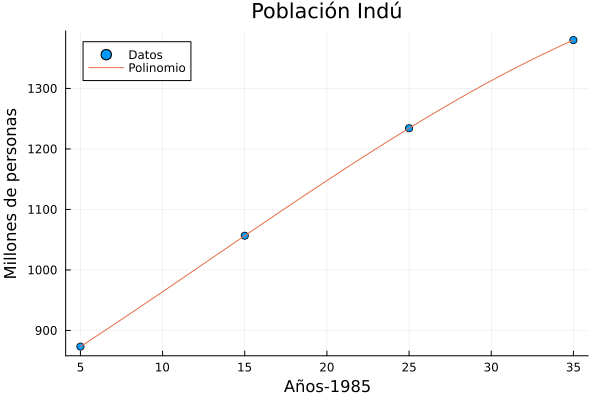

In [38]:
scatter(aux, p3, label="Datos", title="Población Indú", ylabel="Millones de personas", xlabel="Años-1985")
plot!(xx, pInd.(xx), label="Polinomio")

# Ejercicio 4.
## (a) Usando solo los datos de los años 1860 a 1900

 Primero, los datos de población para los años 1860, 1870, 1880, 1890 y 1900 son:
$- 1860: 112216$
$- 1870: 125015$
$- 1880: 146608$
$- 1890: 168493$
$- 1900: 184735$

 El tiempo $t$ se define como $t = \frac{\text{year} - 1860}{10}$, lo que nos da:
$- 1860:  t = 0$
$- 1870:  t = 1$
$- 1880:  t = 2$
$- 1890:  t = 3$
$- 1900:  t = 4$

Ahora, podemos interpolar estos datos utilizando un polinomio de grado 4 (ya que hay 5 puntos) y graficar tanto el polinomio como los puntos originales.

## (b) Interpolación usando todos los datos

Para este caso, utilizaremos los datos de todos los años desde 1790 hasta 1900. Con 12 puntos, el polinomio interpolante será de grado 11.

Luego, compararemos la interpolación utilizando solo los datos de 1860 a 1900 con la interpolación utilizando todos los datos. A menudo, al utilizar un mayor número de puntos, especialmente cuando los puntos están muy espaciados, se puede observar el fenómeno de **oscilaciones** no deseadas, lo que se conoce como el fenómeno de **Runge**.

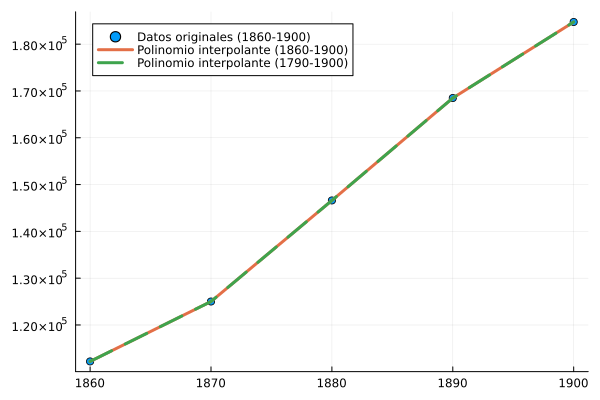

In [39]:
using Polynomials
using Plots

# Datos
years = [1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900]
populations = [59096, 64273, 72674, 72749, 76748, 78085, 91532, 112216, 125015, 146608, 168493, 184735]

# (a) Interpolación usando solo los datos de 1860 a 1900
t = (years .- 1860) ./ 10
t_1860_1900 = t[8:end]
pop_1860_1900 = populations[8:end]

# Polinomio interpolante para datos de 1860 a 1900
p1 = fit(t_1860_1900, pop_1860_1900, 4)

# Gráfica del polinomio y los puntos originales
plot(t_1860_1900 * 10 .+ 1860, pop_1860_1900, seriestype = :scatter, label = "Datos originales (1860-1900)", legend=:topleft)
plot!(t_1860_1900 * 10 .+ 1860, p1.(t_1860_1900), label = "Polinomio interpolante (1860-1900)", linewidth = 3)

# (b) Interpolación usando todos los datos
p2 = fit(t, populations, 11)

# Gráfica del polinomio interpolante con todos los datos
plot!(t[8:end] * 10 .+ 1860, p2.(t[8:end]), label = "Polinomio interpolante (1790-1900)", linestyle = :dash, linewidth = 3)

### Comentario sobre los resultados

- **(a) Interpolación de 1860 a 1900:** Este ajuste es generalmente más suave y sigue bien los datos en este intervalo específico.

- **(b) Interpolación usando todos los datos:** Aquí es donde se observa el fenómeno de Runge. Aunque se utiliza más información, el polinomio de grado 11 tiende a oscilar entre los puntos, lo que puede llevar a un ajuste que no representa correctamente la tendencia de los datos en el intervalo deseado (1860 a 1900). Por lo tanto, aunque el polinomio pasa por todos los puntos, su comportamiento fuera de estos puntos puede ser errático y no deseado.

Este fenómeno destaca que a veces menos es más, y usar solo los datos relevantes para el intervalo de interés puede producir un resultado más confiable.

# Ejercicio 5

## Datos
## La población mundial para los años que se indican era:

| Año    | 1965   | 1975   | 1985   | 1990   |
|--------|--------|--------|--------|--------|
| Población (millones) | 3340   | 4080   | 4850   | 5290   |

## Preguntas
## 1. Predicción para 1990:  
   ## ¿Hubiese sido buena la predicción para 1990 de la función de interpolación cuadrática correspondiente a los otros tres años?  
   

## 2. Estimación del año para 6500 millones:

In [52]:
# Datos proporcionados
x = [1965, 1975, 1985]  # Años
y = [3340, 4080, 4850]   # Población en millones

# Construir el sistema de ecuaciones para el polinomio cuadrático
A = [x[1]^2 x[1] 1; x[2]^2 x[2] 1; x[3]^2 x[3] 1]
b = y

# Resolver el sistema para los coeficientes del polinomio
coeffs = A \ b

# Definir el polinomio cuadrático
polynomial(x) = coeffs[1] * x^2 + coeffs[2] * x + coeffs[3]

# (a) Predicción para 1990
x_eval_a = 1990
y_eval_a = polynomial(x_eval_a)
println("Población estimada en $x_eval_a: ", y_eval_a, " millones")

# (b) Estimación del año para una población de 6500 millones
y_target = 6500
# Resolver polynomial(x) = y_target
using Roots
x_eval_b = find_zero(x -> polynomial(x) - y_target, 1985)  # Buscar raíz cerca de 1985
println("La población alcanzó 6500 millones en el año: ", x_eval_b)

Población estimada en 1990: 5246.250000000233 millones
La población alcanzó 6500 millones en el año: 2005.23658702942
